Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D, Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
)

C:\Users\abhay\anaconda3\envs\DL_projects\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhay\anaconda3\envs\DL_projects\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhay\anaconda3\envs\DL_projects\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhay\anaconda3\envs\DL_p

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/abhay/Downloads/Assignment_dL/Train")
data_dir_test = pathlib.Path('C:/Users/abhay/Downloads/Assignment_dL/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

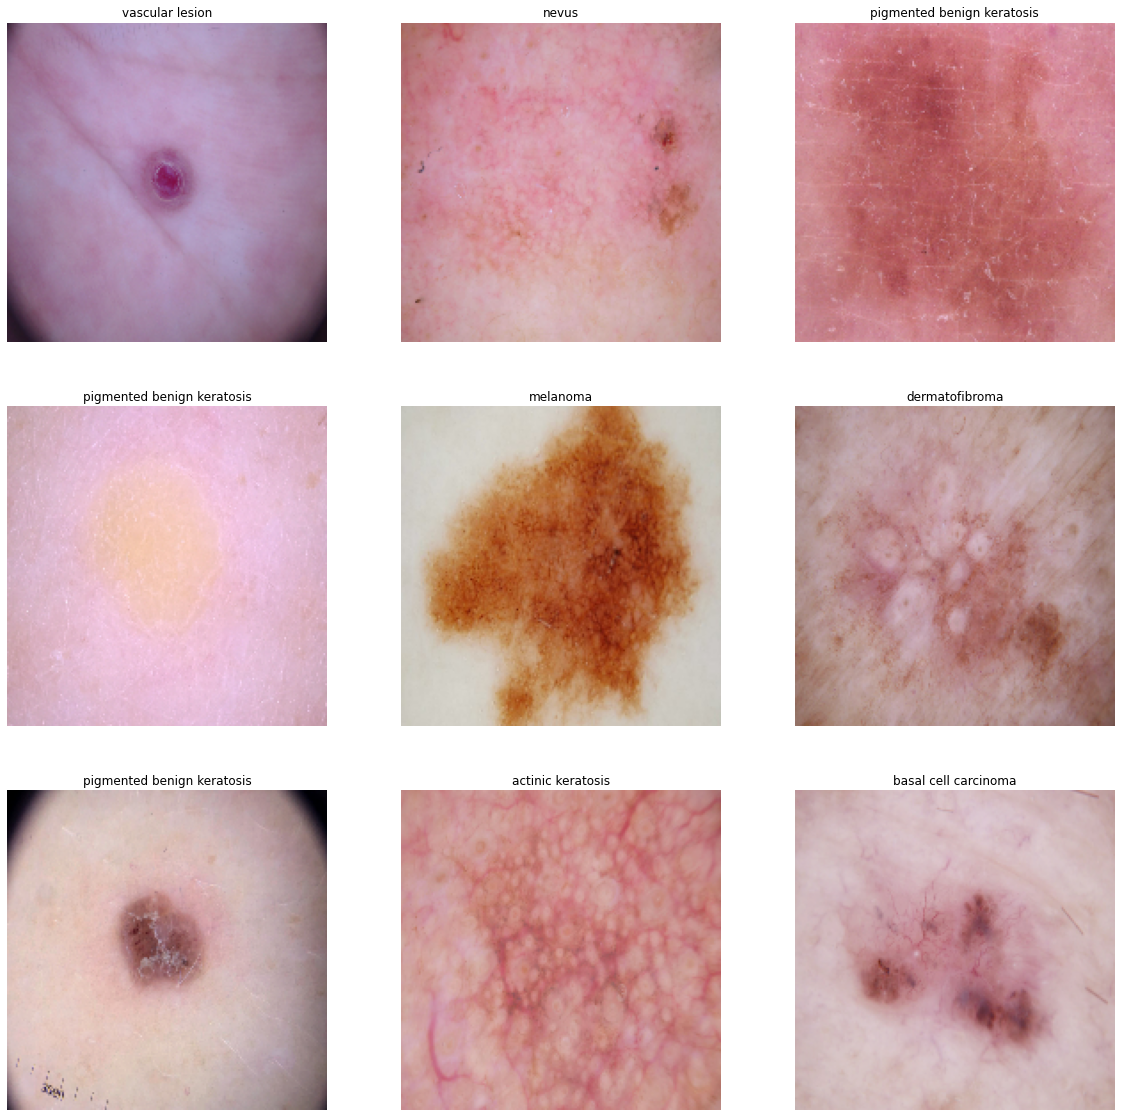

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
#Sequential allows you to create models layer-by-layer  
num_of_classes = 9 # As target class has 9 labels

cnn_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(264, activation='relu'),
  layers.Dense(num_of_classes)]
    )

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
cnn_model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0

### Train the model

In [14]:
epochs = 20
history = cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 26s 373ms/step - loss: 2.0277 - accuracy: 0.2204 - val_loss: 1.9798 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 18s 322ms/step - loss: 1.8923 - accuracy: 0.2712 - val_loss: 1.9053 - val_accuracy: 0.2752
Epoch 3/20
56/56 [==============================] - 18s 313ms/step - loss: 1.8271 - accuracy: 0.3220 - val_loss: 1.7903 - val_accuracy: 0.3356
Epoch 4/20
56/56 [==============================] - 17s 310ms/step - loss: 1.7867 - accuracy: 0.3281 - val_loss: 1.7397 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 17s 308ms/step - loss: 1.7479 - accuracy: 0.3549 - val_loss: 1.6656 - val_accuracy: 0.4183
Epoch 6/20
56/56 [==============================] - 17s 312ms/step - loss: 1.6258 - accuracy: 0.4180 - val_loss: 1.6863 - val_accuracy: 0.3915
Epoch 7/20
56/56 [==============================] - 17s 310ms/step - loss: 1.5242 - accuracy: 0.4598 - val_loss: 1.4762 - val_accuracy: 0.5011

### Visualizing training results

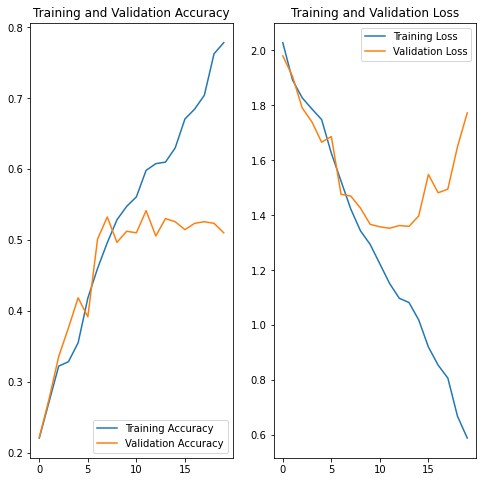

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

According to the graph there is a sign of model overfitting. This can be proved as the train accuracy is around 0.7785 and the validation accuracy is around 0.5101. Hence it is safe to assume that the model is overfitting further changes are required to make sure that the model's train and validation accuracy is close by. The difference between the validation loss and the train loss is quite high hence it can be said that the model is overfitted with the data. This is a big problem for the model

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

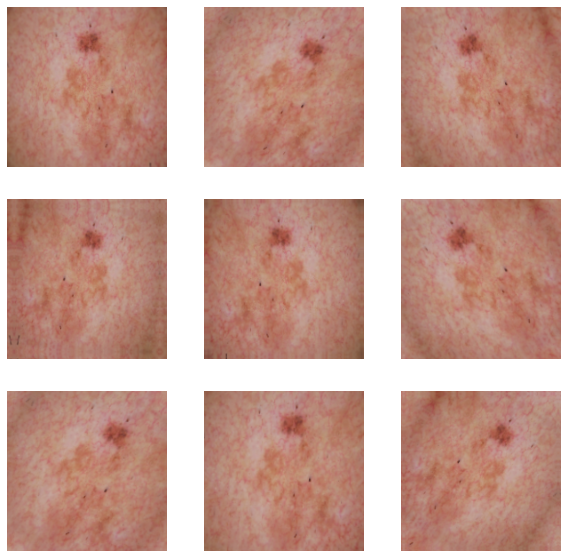

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

cnn_model_2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(264, activation='relu'),
  layers.Dense(num_of_classes)
])

### Compiling the model

In [19]:
## Your code goes here
cnn_model_2.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 8)       224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 90, 16)        1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 45, 45, 16)       

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
history = cnn_model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 21s 364ms/step - loss: 1.7269 - accuracy: 0.3823 - val_loss: 2.1201 - val_accuracy: 0.2752
Epoch 2/20
56/56 [==============================] - 20s 364ms/step - loss: 1.5210 - accuracy: 0.4554 - val_loss: 2.1443 - val_accuracy: 0.1991
Epoch 3/20
56/56 [==============================] - 21s 373ms/step - loss: 1.3518 - accuracy: 0.5201 - val_loss: 2.0217 - val_accuracy: 0.3736
Epoch 4/20
56/56 [==============================] - 21s 382ms/step - loss: 1.2956 - accuracy: 0.5463 - val_loss: 2.0189 - val_accuracy: 0.3154
Epoch 5/20
56/56 [==============================] - 21s 373ms/step - loss: 1.2366 - accuracy: 0.5592 - val_loss: 1.8885 - val_accuracy: 0.3602
Epoch 6/20
56/56 [==============================] - 21s 368ms/step - loss: 1.1808 - accuracy: 0.5820 - val_loss: 1.6926 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 20s 361ms/step - loss: 1.1462 - accuracy: 0.5915 - val_loss: 1.7066 - val_accuracy: 0.4407

### Visualizing the results

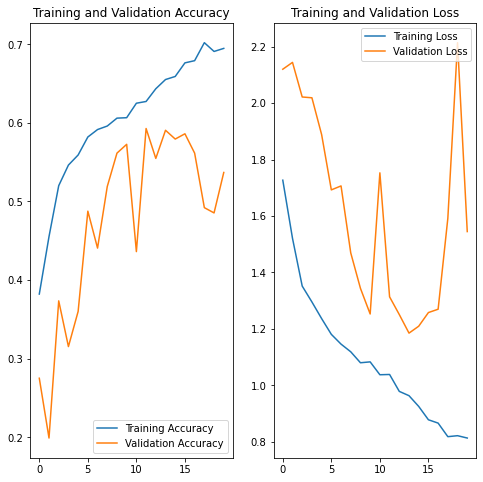

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The model is overfitting this time as well. It is clearly shown as the train accuracy is around 0.6948 and the validation accuracy is around 0.5369. It is not better than the previous model run as the difference between train accuracy and the validation accuracy is more. When looking at the loss graph it can be clearly said that the training loss is much higher than the validation loss quite high as well. This is clear indication of the model is being overfitted. Hence it is very high problem for the model.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [24]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis')]


In [25]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,C:\Users\abhay\Downloads\Assignment_dL\Train\a...,actinic keratosis
1,C:\Users\abhay\Downloads\Assignment_dL\Train\a...,actinic keratosis
2,C:\Users\abhay\Downloads\Assignment_dL\Train\a...,actinic keratosis
3,C:\Users\abhay\Downloads\Assignment_dL\Train\a...,actinic keratosis
4,C:\Users\abhay\Downloads\Assignment_dL\Train\a...,actinic keratosis


In [26]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

#### - Which class has the least number of samples?

The least number of samples are present in seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?

The various classes which dominate the data in terms of proportionate number of samples are pigmented benign keratosis,
melanoma, basal cell carcinoma and nevus. These have a large number of samples which are 462, 438, 376 and 357 numnber of samples respectively

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x285945CBDA0>: 100%|█| 500/500 [00:02<00:00, 231.08 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2859445E4E0>: 100%|█| 500/500 [00:02<00:00, 230.76 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x285941FC4E0>: 100%|█| 500/500 [00:02<00:


Initialised with 438 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x28594219B38>: 100%|█| 500/500 [00:15<00:00, 31.77 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2859427CCC0>: 100%|█| 500/500 [00:11<00:00, 42.64 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2859426DBA8>: 100%|█| 500/500 [00:02<00:00, 237.31 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2859423BB00>: 100%|█| 500/500 [00:05<00:00, 95.35 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2859422C080>: 100%|█| 500/500 [00:02<00:


Initialised with 139 image(s) found.
Output directory set to C:\Users\abhay\Downloads\Assignment_dL\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x285945E5B00>: 100%|█| 500/500 [00:02<00:00, 212.34 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_481e1490-ae9c-4008-acce-8d426a74e4f5.jpg',
 'C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_99accfb5-4420-4696-8d14-d18d376c408b.jpg',
 'C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_5903ff37-e018-4471-a474-cecbd210d513.jpg',
 'C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_62491731-f09e-4f2c-a190-1401a1e57783.jpg',
 'C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_d1caa04e-7b78-4148-a147-5be0b2187e49.jpg',
 'C:\\Users\\abhay\\Downloads\\Assignment_dL\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_237a34e0-7fa5-4895-9d1e-395104040d49.jpg'

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [32]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [34]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [36]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [38]:
# your code goes here
cnn_model_3 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (180,180,3)),
  layers.Conv2D(16,3,padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.Conv2D(32,3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.Conv2D(64,3,padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.Conv2D(128,3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.Conv2D(256,3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_of_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [39]:
## your code goes here
cnn_model_3.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
cnn_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [42]:
epochs = 30
## Your code goes here, use 50 epochs.
history = cnn_model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 114s 665ms/step - loss: 1.9537 - accuracy: 0.2385 - val_loss: 1.6927 - val_accuracy: 0.3437
Epoch 2/30
169/169 [==============================] - 107s 634ms/step - loss: 1.5874 - accuracy: 0.3858 - val_loss: 1.4877 - val_accuracy: 0.4388
Epoch 3/30
169/169 [==============================] - 106s 623ms/step - loss: 1.4743 - accuracy: 0.4282 - val_loss: 1.4280 - val_accuracy: 0.4380
Epoch 4/30
169/169 [==============================] - 108s 637ms/step - loss: 1.4338 - accuracy: 0.4427 - val_loss: 1.4046 - val_accuracy: 0.4610
Epoch 5/30
169/169 [==============================] - 105s 620ms/step - loss: 1.3178 - accuracy: 0.4865 - val_loss: 1.2377 - val_accuracy: 0.5078
Epoch 6/30
169/169 [==============================] - 104s 611ms/step - loss: 1.2769 - accuracy: 0.5063 - val_loss: 1.2598 - val_accuracy: 0.4937
Epoch 7/30
169/169 [==============================] - 106s 626ms/step - loss: 1.2325 - accuracy: 0.5334 - val_loss: 1.1380 -

#### **Todo:**  Visualize the model results

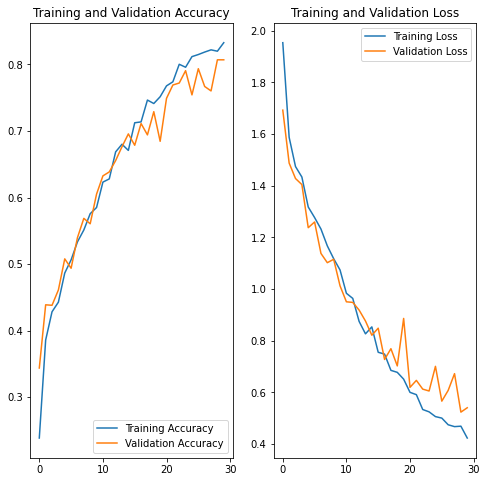

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The results are quiet good as the training accuracy and validation accuracy are around 0.8327 and 0.8070 respectively. These are good accuracy as the difference between the training accuracy and the validation accuracy is quiet low. This clearly shows that the class rebalance is helpful. It can be said that the loss should be reduced so that the model can be further reduced. Also, according to me the accuracy should be increased a bit. 